In [1]:
import utils
import ipywidgets as widgets
import A1.models as A1, A2.models as A2, B1.models as B1, B2.models as B2

Each task uses a different comibination of dataset, feature_col, file_col, and module:

In [2]:
TASKS = {'A1':('celeba',2,1,A1), 'A2':('celeba',3,1,A2), 'B1':('cartoon_set',2,3,B1),'B2':('cartoon_set',1,3,B2)}
task = widgets.RadioButtons(options=TASKS, description='Task')

In [4]:
task

RadioButtons(description='Task', index=2, options={'A1': ('celeba', 2, 1, <module 'A1.models' from '/Users/mar…

cartoon_set:   0%|          | 0/10000 [00:00<?, ?it/s]

Loaded 120,000,000 bytes


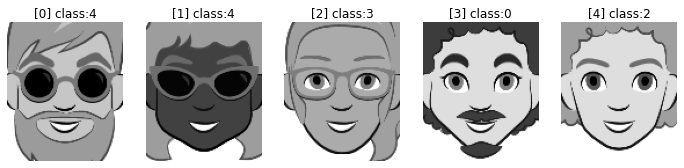

cartoon_set_test:   0%|          | 0/2500 [00:00<?, ?it/s]

Loaded 30,000,000 bytes


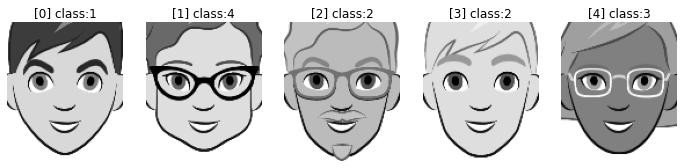

In [5]:
dataset, feature_col, file_col, models = task.value
X, y = utils.load_data(dataset, feature_col, file_col, models.load_image)
X_test, y_test = utils.load_data(dataset, feature_col, file_col, models.load_image, test=True)

In [6]:
opts = {**A1.options, **A2.options, **B1.options, **B2.options}
selected = list(models.options.values())[0]
options = widgets.Dropdown(options=opts, value=selected, description='Model', layout=widgets.Layout(width='70%'))

In [7]:
options

Dropdown(description='Model', index=8, layout=Layout(width='70%'), options={'*Best A1: PCA & SVC with CV optim…

Peforming Cross Validation on optimal criterion...


cross validation:   0%|          | 0/2 [00:00<?, ?it/s]

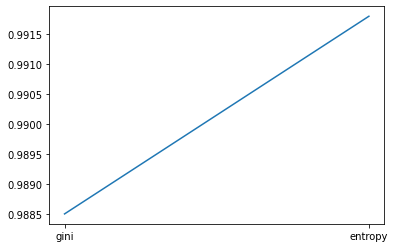

Optimal criterion is entropy
Peforming Cross Validation on optimal max_depth...


cross validation:   0%|          | 0/6 [00:00<?, ?it/s]

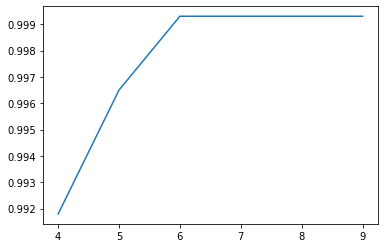

Optimal max_depth is 6
Performing final fit on all data with optimal params...


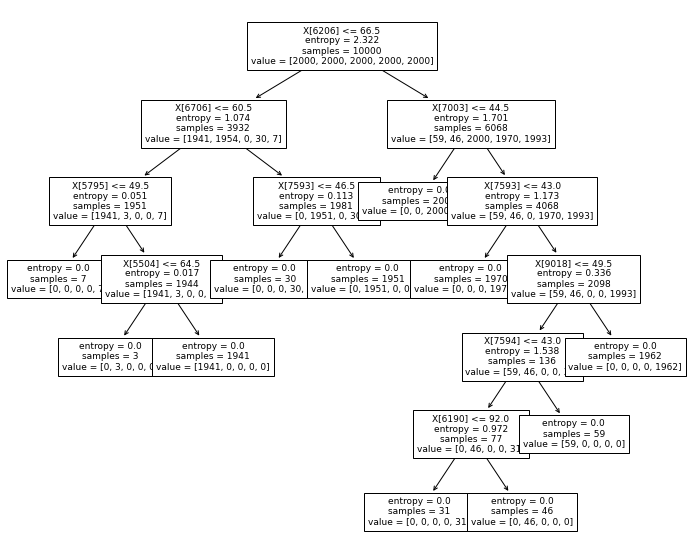

Accuracy on trained data: 100.00%


In [8]:
model = options.value
print(f"Accuracy on trained data: {model.fit(X, y):.2%}")

In [9]:
y_pred = model.predict(X_test)
print(f"Accuracy on test data: {(y_test==y_pred).mean():.2%}")

Accuracy on test data: 99.96%


There were 1 wrong predictions out of 2500


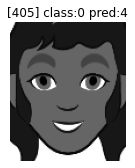

In [10]:
utils.show_wrong(X_test, y_test, y_pred)

In [261]:
import importlib
importlib.reload(A1)

<module 'A1.models' from '/Users/marc/Projects/AMLS_assignment22_23/A1/models.py'>